In [1]:
# baalightcurve, but using jupyter to get more interactive with the data
import csv
import matplotlib.pyplot as plt
import os
import datetime
from astropy.table import Table

In [2]:
vssdir='/home/john/astro/variable_star_data'
vssfile = 'AH_DRA_20220912_201510.csv'
star_name=vssfile.split('_2')[0]
vssfullpath = os.path.join(vssdir, vssfile)

In [3]:
#  Original Method:  Using csvload to pick out parts of the data file.

In [4]:
jdmodifier = 2400000.0  #discard first N digits of jd here
jd_obs = []
mag = []
ut = []

with open(vssfullpath) as csvfile:
    baaread = csv.DictReader(csvfile, delimiter=',')
    for row in baaread:
#       print(row['Julian Date'], row['Magnitude'])
        jd_obs.append(float(row['Julian Date'])-jdmodifier)
        mag.append(float(row['Magnitude']))
        if '.' in row['UT']:  # has microseconds
            datetmp = datetime.datetime.strptime(row['UT'], "%d %b %Y %H:%M:%S.%f")
        else:
            datetmp = datetime.datetime.strptime(row['UT'], "%d %b %Y %H:%M:%S")
        ut.append(datetmp)
n_obs = len(jd_obs)

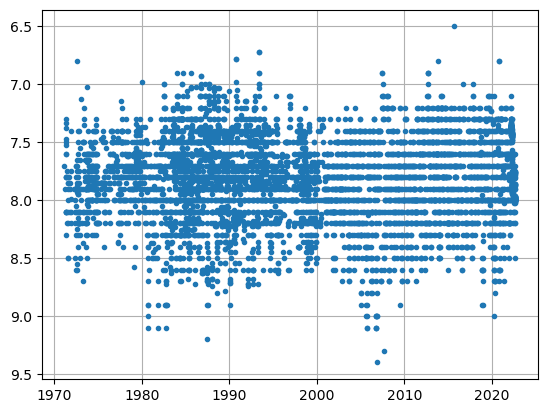

In [5]:
plt.plot(ut, mag,'.')
plt.gca().invert_yaxis()
plt.grid()
plt.rcParams['figure.figsize'] = [14, 10]

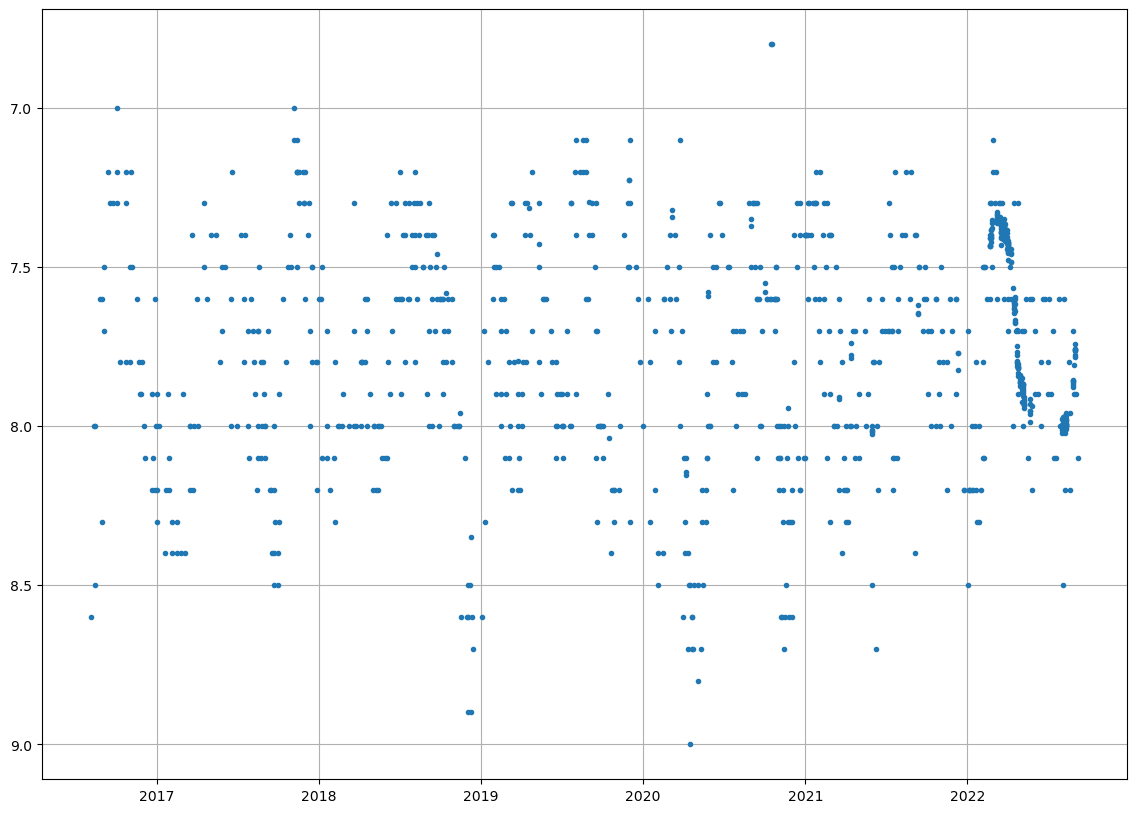

In [6]:
plt.plot(ut[0:1000], mag[0:1000],'.')
plt.gca().invert_yaxis()
plt.grid()
plt.rcParams['figure.figsize'] = [14, 10]

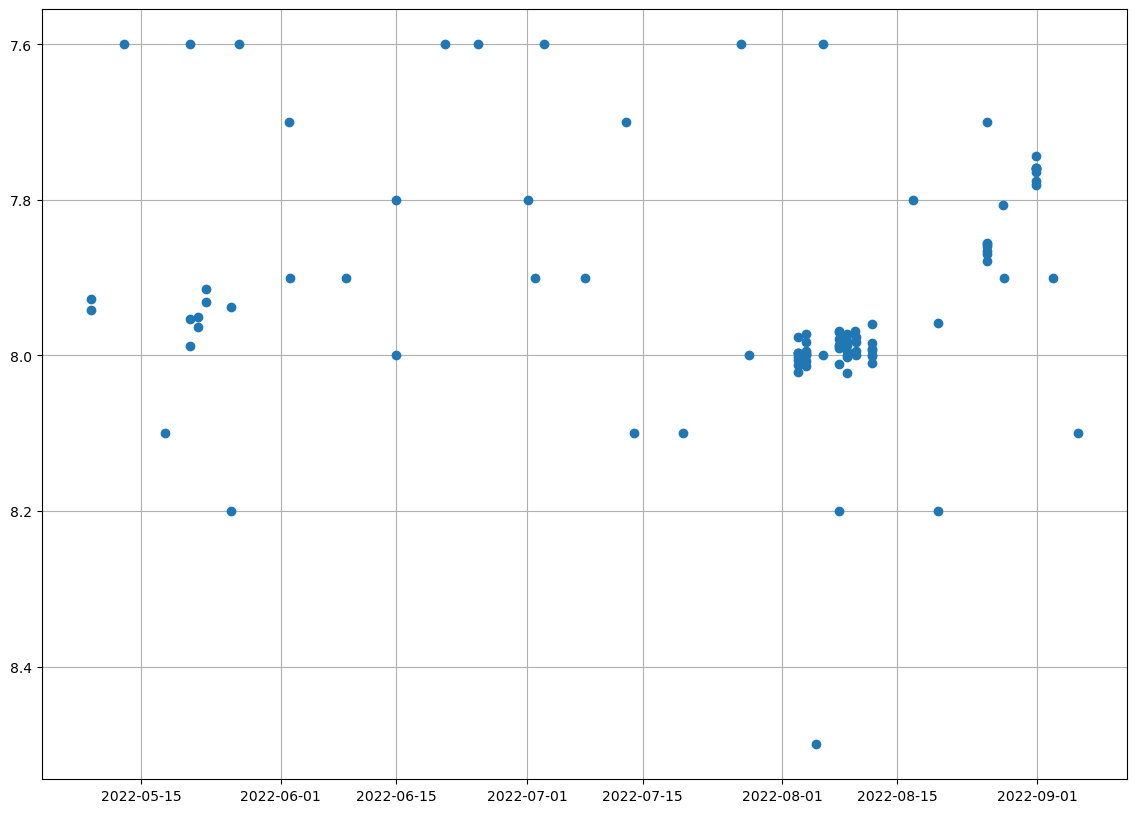

In [7]:
plt.plot(ut[0:100], mag[0:100],'o')
plt.gca().invert_yaxis()
plt.grid()
plt.rcParams['figure.figsize'] = [14, 10]

In [8]:
#  New method: based on astropy Table (from AAVSO tutorial)

In [9]:
baa_data = Table.read(vssfullpath, encoding='UTF-8')
baa_data

Object,Julian Date,UT,Magnitude Qualifier,Magnitude,Magnitude Error,Observer Name,Method,Equipment,Filter,Chart / Sequence,Visual Estimates,CCD Measurement Data: Measurement Type;Star Type;Star Id;Measured Mag;Measured Error;Reference Mag;Reference Error,Observation_Id
str6,float64,str27,str7,float64,float64,str14,str12,str37,str39,str24,str19,str219,int64
AH DRA,2459828.417,5 Sep 2022 22:00:00,Equal,8.1,--,D Hale-Sutton,Visual,B7x50,No Filter,106.03,1(3)V(1)8,--,4592345
AH DRA,2459825.42,2 Sep 2022 22:05:00,Equal,7.9,--,S W Albrighton,Visual,20x80B,No Filter,106.03,6-1,--,4593215
AH DRA,2459823.409178,31 Aug 2022 21:49:12.979200,Equal,7.7813,0.0145,C Watkins,CMOS,Samyang 135mm f2 Altair Hypercam 183M,Green Filter (tricolour),AAVSO Sequence X26648AKN,--,Instrumental;Variable;AH Dra;15.7193;0.0121\nInstrumental;Comparison;70;14.9780;0.0083;7.0490\nInstrumental;Comparison;80;15.9496;0.0141;8.0030\nInstrumental;Comparison;84;16.3561;0.0185;8.3990,4588671
AH DRA,2459823.408472,31 Aug 2022 21:48:11.980800,Equal,7.7642,0.0139,C Watkins,CMOS,Samyang 135mm f2 Altair Hypercam 183M,Green Filter (tricolour),AAVSO Sequence X26648AKN,--,Instrumental;Variable;AH Dra;15.6199;0.0117\nInstrumental;Comparison;70;14.8891;0.0079;7.0490\nInstrumental;Comparison;80;15.8671;0.0134;8.0030\nInstrumental;Comparison;84;16.2982;0.0175;8.3990,4588670
AH DRA,2459823.407755,31 Aug 2022 21:47:10.032000,Equal,7.7595,0.0151,C Watkins,CMOS,Samyang 135mm f2 Altair Hypercam 183M,Green Filter (tricolour),AAVSO Sequence X26648AKN,--,Instrumental;Variable;AH Dra;15.7766;0.0126\nInstrumental;Comparison;70;15.0602;0.0087;7.0490\nInstrumental;Comparison;80;16.0266;0.0149;8.0030\nInstrumental;Comparison;84;16.4278;0.0191;8.3990,4588669
AH DRA,2459823.407049,31 Aug 2022 21:46:09.033600,Equal,7.7585,0.0173,C Watkins,CMOS,Samyang 135mm f2 Altair Hypercam 183M,Green Filter (tricolour),AAVSO Sequence X26648AKN,--,Instrumental;Variable;AH Dra;15.9825;0.0143\nInstrumental;Comparison;70;15.2680;0.0099;7.0490\nInstrumental;Comparison;80;16.2345;0.0173;8.0030\nInstrumental;Comparison;84;16.6299;0.0230;8.3990,4588668
...,...,...,...,...,...,...,...,...,...,...,...,...,...
AH DRA,2441058.5,17 Apr 1971 00:00:00.000000,Equal,7.33,--,J E Isles,Visual,B12X40,No Filter,"1,2",1-1;2+1;4+9,\n,683623
AH DRA,2441055.5,14 Apr 1971 00:00:00.000000,Equal,7.3,--,J E Isles,Visual,B12X40,No Filter,"1,2",2+1;4+9,\n,683622


In [10]:
#  using modified version of function from aavso
def plot_lightcurve(data_JD, data_mag, chart_title, JDmin, JDmax):
    plt.scatter(data_JD, data_mag, marker='.')
    plt.gca().invert_yaxis()
    plt.title(chart_title)
    plt.xlim([JDmin, JDmax])
    xvals = plt.gca().get_xticks()
    plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in xvals])
    plt.show() 

/tmp/ipykernel_5144/879423042.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in xvals])


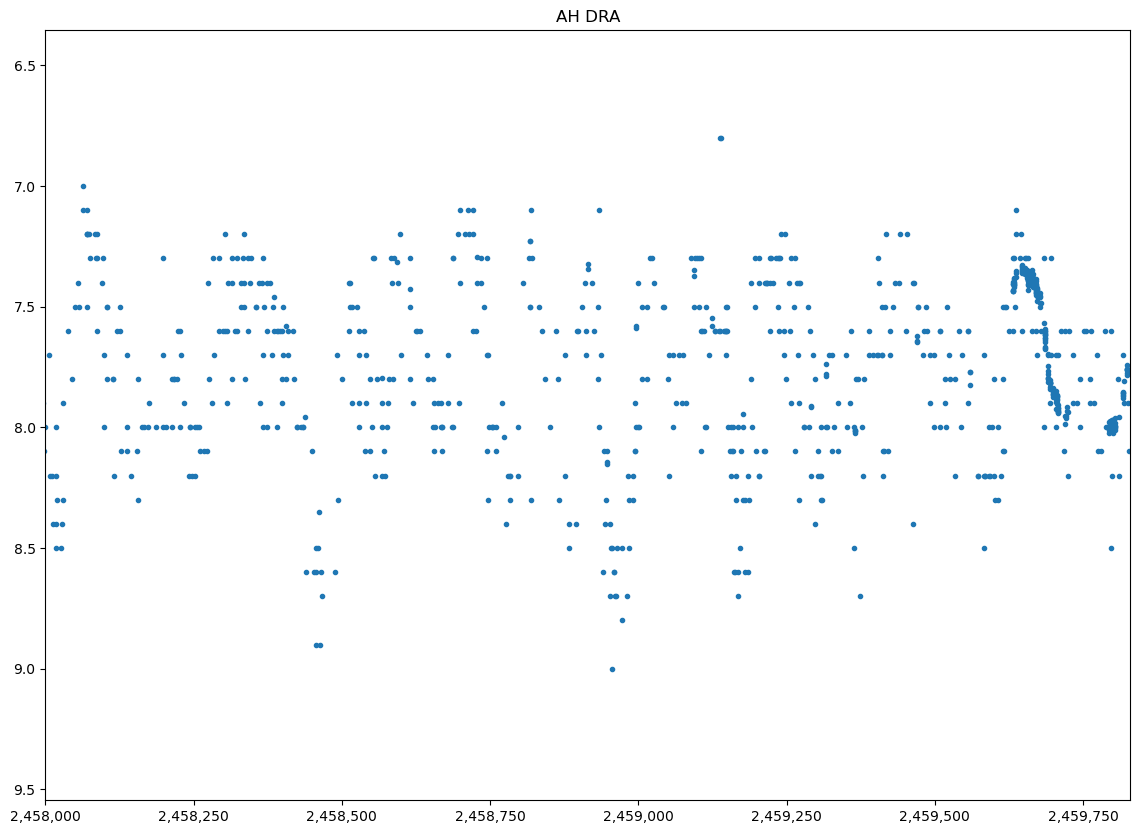

In [11]:
plot_lightcurve(baa_data['Julian Date'], baa_data['Magnitude'], baa_data['Object'][0], 2458000, 2459830)